<a href="https://colab.research.google.com/github/arzss-code/pengolahan-citra/blob/main/jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02 - Operasi Deteksi Tepi

Praktikum 1. Deteksi Tepi menggunakan operator sobel

Operator Sobel Pada Gambar Grayscale

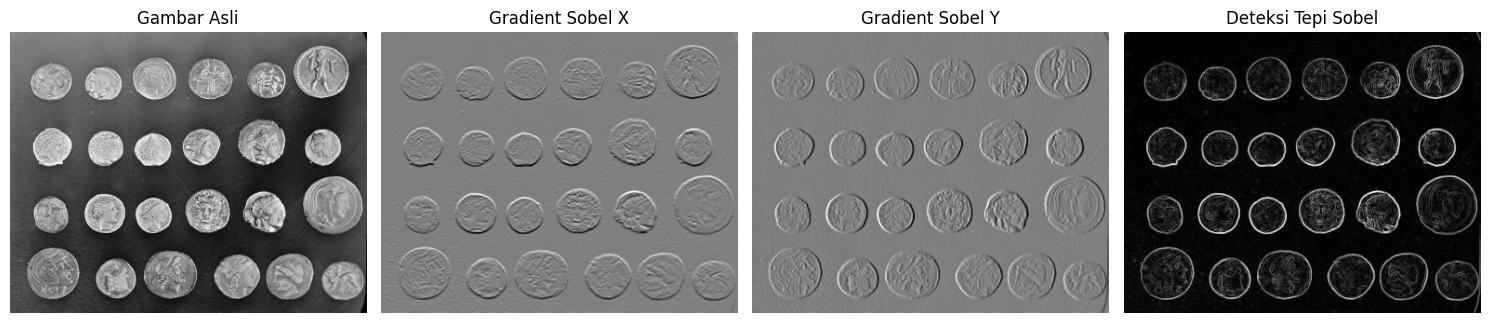

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage
image = data.coins() # Menggunakan gambar coin bawaan dari skimage
gray_image = color.rgb2gray(image) if image.ndim == 3 else image # Konversi ke grayscale jika perlu

# Hitung gradien menggunakan Operator Sobel
sobel_x = filters.sobel_h(gray_image) # Sobel di arah horizontal
sobel_y = filters.sobel_v(gray_image) # Sobel di arah vertikal
sobel_edge = filters.sobel(gray_image) # Kombinasi keduanya

# Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradient Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradient Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")

plt.tight_layout()
plt.show()

Operator Sobel Pada Gambar Berwarna

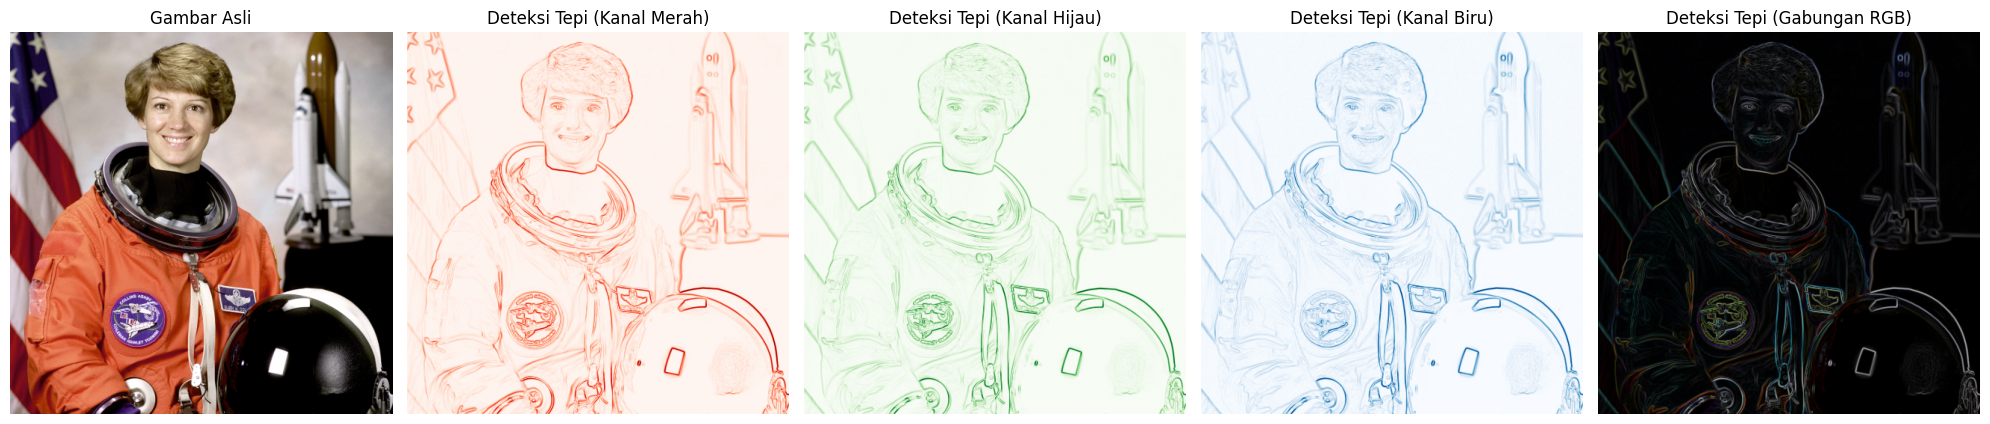

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage (gambar astronaut berwarna)
image = data.astronaut()  # Gambar berwarna bawaan dari skimage

# Pisahkan kanal warna
red_channel = image[:, :, 0]  # Kanal merah
green_channel = image[:, :, 1]  # Kanal hijau
blue_channel = image[:, :, 2]  # Kanal biru

# Terapkan Operator Sobel pada masing-masing kanal warna
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

# Gabungkan hasil dengan mengambil rata-rata dari ketiga kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi Tepi (Kanal Merah)")
ax[1].axis("off")

ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi Tepi (Kanal Hijau)")
ax[2].axis("off")

ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi Tepi (Kanal Biru)")
ax[3].axis("off")

ax[4].imshow(sobel_color)
ax[4].set_title("Deteksi Tepi (Gabungan RGB)")
ax[4].axis("off")

plt.tight_layout()
plt.show()


Praktikum 2. Deteksi Tepi dengan operator Roberts

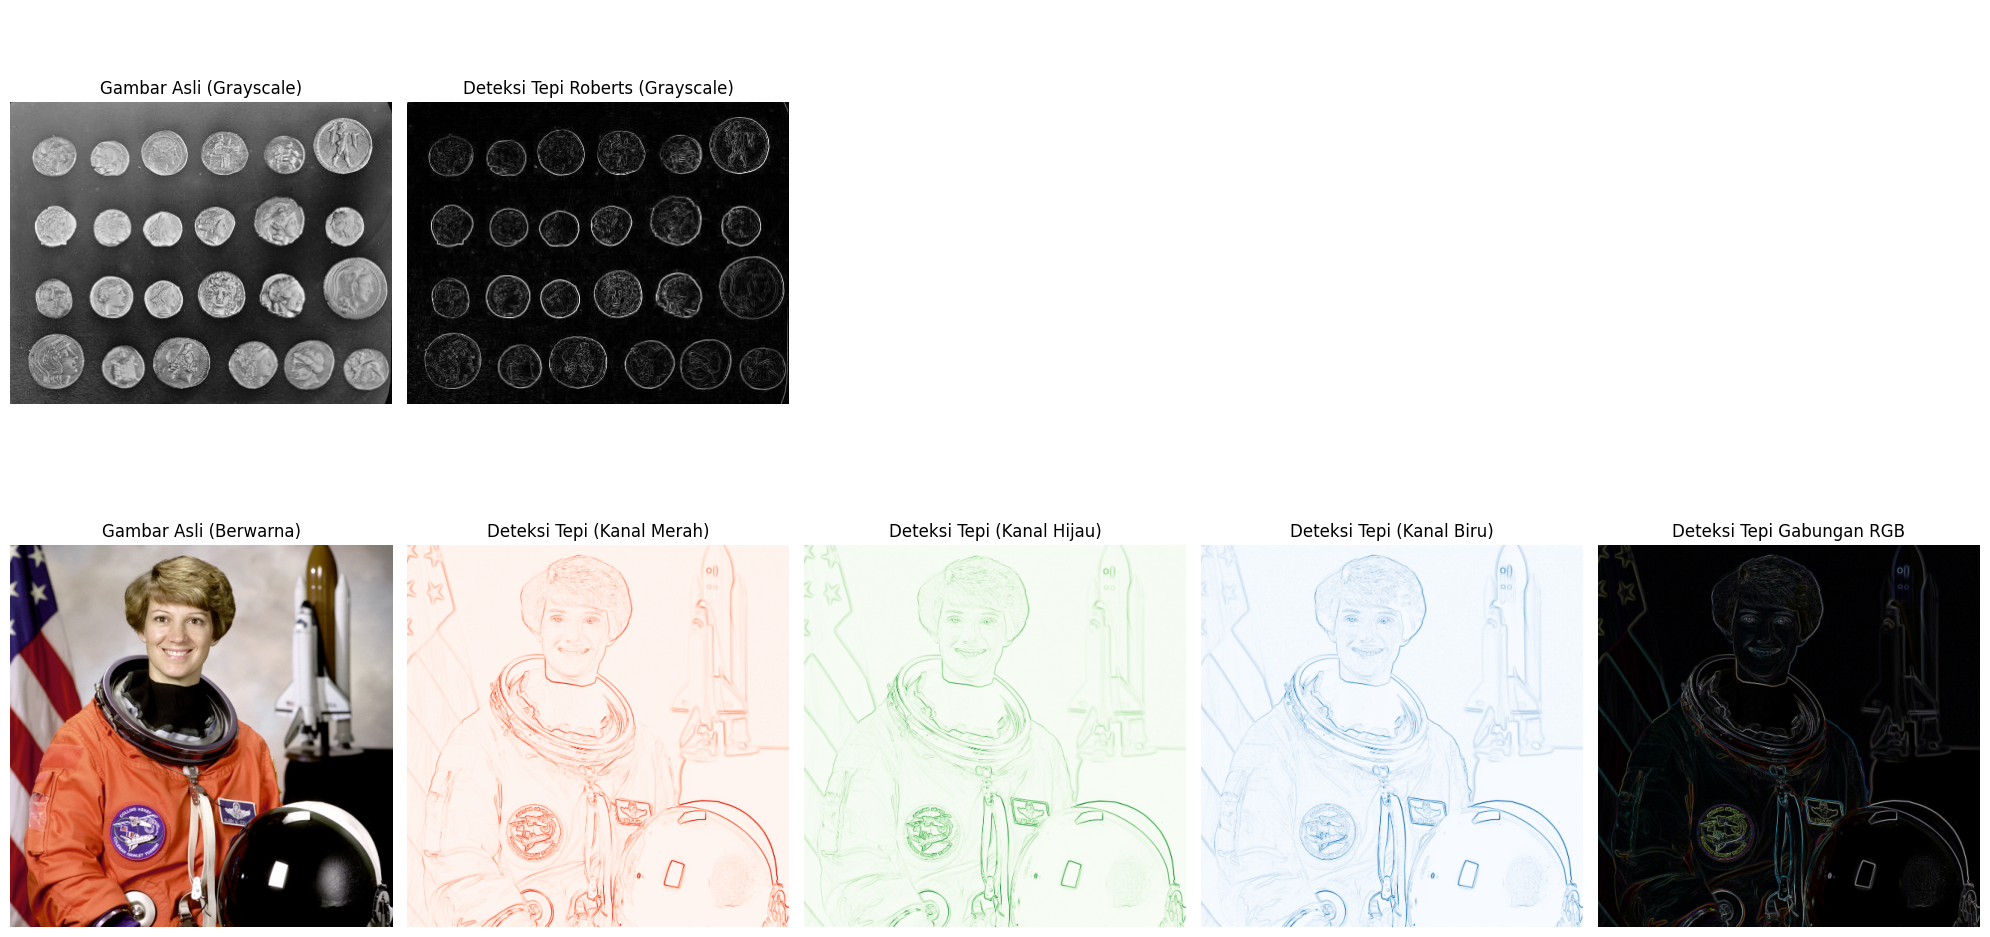

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# ===================== 1⃣ DETEKSI TEPI ROBERTS PADA CITRA GRAYSCALE =====================

# Ambil gambar grayscale dari skimage
image_gray = data.coins()  # Menggunakan gambar koin (grayscale)

# Terapkan Operator Roberts
roberts_gray = filters.roberts(image_gray)

# ===================== 2⃣ DETEKSI TEPI ROBERTS PADA CITRA BERWARNA =====================

# Ambil gambar berwarna dari skimage
image_color = data.astronaut()  # Menggunakan gambar astronaut (berwarna)

# Pisahkan kanal warna (R, G, B)
red_channel = image_color[:, :, 0]  # Kanal merah
green_channel = image_color[:, :, 1]  # Kanal hijau
blue_channel = image_color[:, :, 2]  # Kanal biru

# Terapkan Operator Roberts pada masing-masing kanal warna
roberts_red = filters.roberts(red_channel)
roberts_green = filters.roberts(green_channel)
roberts_blue = filters.roberts(blue_channel)

# Gabungkan hasil deteksi tepi dari ketiga kanal
roberts_color = np.stack((roberts_red, roberts_green, roberts_blue), axis=2)

# ===================== VISUALISASI HASIL =====================

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
ax = axes.ravel()

# Baris 1: Citra Grayscale
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(roberts_gray, cmap='gray')
ax[1].set_title("Deteksi Tepi Roberts (Grayscale)")
ax[1].axis("off")

# Kosongkan posisi 3, 4, dan 5 agar baris pertama rapi
for i in range(2, 5):
    ax[i].axis("off")

# Baris 2: Citra Berwarna
ax[5].imshow(image_color)
ax[5].set_title("Gambar Asli (Berwarna)")
ax[5].axis("off")

ax[6].imshow(roberts_red, cmap='Reds')
ax[6].set_title("Deteksi Tepi (Kanal Merah)")
ax[6].axis("off")

ax[7].imshow(roberts_green, cmap='Greens')
ax[7].set_title("Deteksi Tepi (Kanal Hijau)")
ax[7].axis("off")

ax[8].imshow(roberts_blue, cmap='Blues')
ax[8].set_title("Deteksi Tepi (Kanal Biru)")
ax[8].axis("off")

ax[9].imshow(roberts_color)
ax[9].set_title("Deteksi Tepi Gabungan RGB")
ax[9].axis("off")

plt.tight_layout()
plt.show()


Praktikum 3. Perbandingan deteksi tepi dengan beberapa operator (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra grayscale

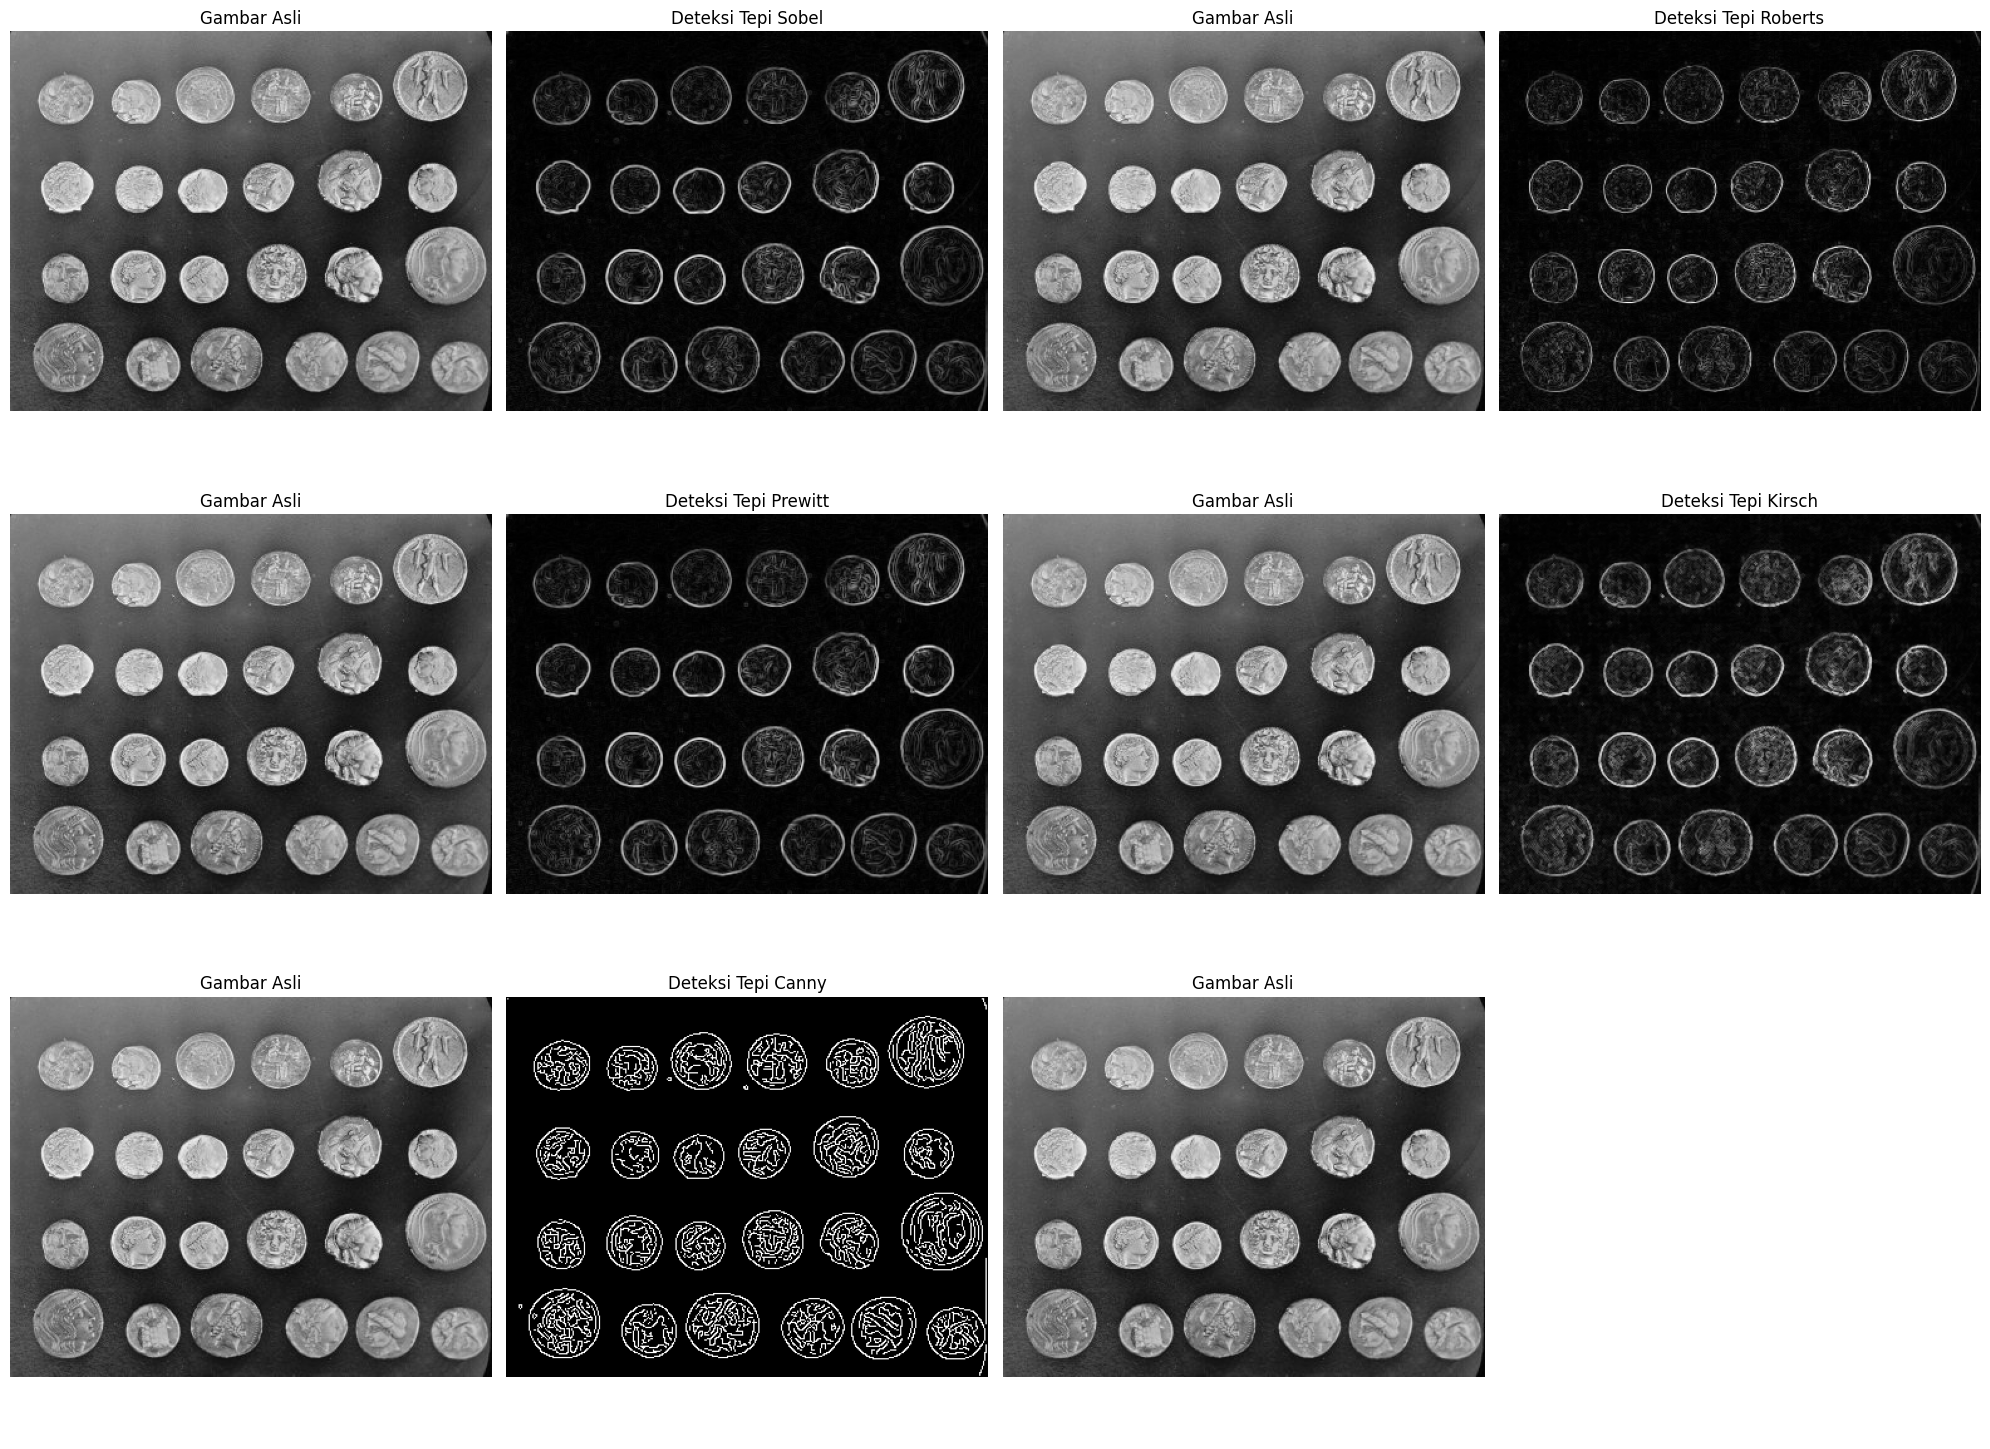

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE =====================

# Menggunakan gambar koin dari skimage
image_gray = data.coins()  # Gambar grayscale

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# Operator Sobel
sobel_edge = filters.sobel(image_gray)

# Operator Roberts
roberts_edge = filters.roberts(image_gray)

# Operator Prewitt
prewitt_edge = filters.prewitt(image_gray)

# Operator Kirsch (Menggunakan filter gradien berbasis morfologi)
kirsch_edge = gradient(image_gray, disk(1))

# Operator Canny
canny_edge = feature.canny(image_gray, sigma=1)

# ===================== 3⃣ VISUALISASI HASIL (FORMAT 4 KOLOM, 3 BARIS) =====================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
ax = axes.ravel()

# Baris 1: Gambar Asli - Sobel
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_edge, cmap='gray')
ax[1].set_title("Deteksi Tepi Sobel")
ax[1].axis("off")

ax[2].imshow(image_gray, cmap='gray')
ax[2].set_title("Gambar Asli")
ax[2].axis("off")

ax[3].imshow(roberts_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Roberts")
ax[3].axis("off")

# Baris 2: Gambar Asli - Prewitt
ax[4].imshow(image_gray, cmap='gray')
ax[4].set_title("Gambar Asli")
ax[4].axis("off")

ax[5].imshow(prewitt_edge, cmap='gray')
ax[5].set_title("Deteksi Tepi Prewitt")
ax[5].axis("off")

ax[6].imshow(image_gray, cmap='gray')
ax[6].set_title("Gambar Asli")
ax[6].axis("off")

ax[7].imshow(kirsch_edge, cmap='gray')
ax[7].set_title("Deteksi Tepi Kirsch")
ax[7].axis("off")

# Baris 3: Gambar Asli - Canny
ax[8].imshow(image_gray, cmap='gray')
ax[8].set_title("Gambar Asli")
ax[8].axis("off")

ax[9].imshow(canny_edge, cmap='gray')
ax[9].set_title("Deteksi Tepi Canny")
ax[9].axis("off")

ax[10].imshow(image_gray, cmap='gray')
ax[10].set_title("Gambar Asli")
ax[10].axis("off")

# Kosongkan posisi terakhir agar tampilan rapi
ax[11].axis("off")

plt.tight_layout()
plt.show()


Praktikum 4. Perbandingan deteksi tepi dengan beberapa operator (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE & BERWARNA =====================

# Menggunakan gambar bawaan dari skimage
image_gray = data.coins()  # Gambar grayscale
image_color = data.astronaut()  # Gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL (FORMAT 4 KOLOM, 6 BARIS) =====================

fig, axes = plt.subplots(6, 4, figsize=(20, 20))
ax = axes.ravel()

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(image_gray, cmap='gray')  # Placeholder
ax[1].axis("off")

ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")

ax[3].imshow(image_color)  # Placeholder
ax[3].axis("off")

# ----- Baris 2: Sobel -----
ax[4].imshow(image_gray, cmap='gray')
ax[4].axis("off")

ax[5].imshow(sobel_gray, cmap='gray')
ax[5].set_title("Sobel (Grayscale)")
ax[5].axis("off")

ax[6].imshow(image_color)
ax[6].axis("off")

ax[7].imshow(sobel_color)
ax[7].set_title("Sobel (Berwarna)")
ax[7].axis("off")

# ----- Baris 3: Roberts -----
ax[8].imshow(image_gray, cmap='gray')
ax[8].axis("off")

ax[9].imshow(roberts_gray, cmap='gray')
ax[9].set_title("Roberts (Grayscale)")
ax[9].axis("off")

ax[10].imshow(image_color)
ax[10].axis("off")

ax[11].imshow(roberts_color)
ax[11].set_title("Roberts (Berwarna)")
ax[11].axis("off")

# ----- Baris 4: Prewitt -----
ax[12].imshow(image_gray, cmap='gray')
ax[12].axis("off")

ax[13].imshow(prewitt_gray, cmap='gray')
ax[13].set_title("Prewitt (Grayscale)")
ax[13].axis("off")

ax[14].imshow(image_color)
ax[14].axis("off")

ax[15].imshow(prewitt_color)
ax[15].set_title("Prewitt (Berwarna)")
ax[15].axis("off")

# ----- Baris 5: Kirsch -----
ax[16].imshow(image_gray, cmap='gray')
ax[16].axis("off")

ax[17].imshow(kirsch_gray, cmap='gray')
ax[17].set_title("Kirsch (Grayscale)")
ax[17].axis("off")

ax[18].imshow(image_color)
ax[18].axis("off")

ax[19].imshow(kirsch_color)
ax[19].set_title("Kirsch (Berwarna)")
ax[19].axis("off")

# ----- Baris 6: Canny -----
ax[20].imshow(image_gray, cmap='gray')
ax[20].axis("off")

ax[21].imshow(canny_gray, cmap='gray')
ax[21].set_title("Canny (Grayscale)")
ax[21].axis("off")

ax[22].imshow(image_color)
ax[22].axis("off")

ax[23].imshow(canny_color, cmap='gray')
ax[23].set_title("Canny (Grayscale dari Berwarna)")
ax[23].axis("off")

plt.tight_layout()
plt.show()


Praktikum 5. Perbandingan deteksi tepi dengan beberapa operator (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra dengan Gambar Sendiri

In [ ]:
# Kode Untuk Upload Image ke google colab
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, feature, io
from skimage.filters.rank import gradient
from skimage.morphology import disk
from PIL import Image  # Digunakan untuk membaca gambar dari file lokal

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE & BERWARNA =====================

# Load gambar JPG dari komputer
image_path_gray = "image_grayscale.jpg"
image_path_color = "image_color.jpg"

image_gray = np.array(Image.open(image_path_gray).convert("L"))  # Membaca sebagai grayscale
image_color = np.array(Image.open(image_path_color))  # Membaca sebagai gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL (FORMAT 4 KOLOM, 6 BARIS) =====================

fig, axes = plt.subplots(6, 4, figsize=(20, 20))
ax = axes.ravel()

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(image_gray, cmap='gray')  # Placeholder
ax[1].axis("off")

ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")

ax[3].imshow(image_color)  # Placeholder
ax[3].axis("off")

# ----- Baris 2: Sobel -----
ax[4].imshow(image_gray, cmap='gray')
ax[4].axis("off")

ax[5].imshow(sobel_gray, cmap='gray')
ax[5].set_title("Sobel (Grayscale)")
ax[5].axis("off")

ax[6].imshow(image_color)
ax[6].axis("off")

ax[7].imshow(sobel_color)
ax[7].set_title("Sobel (Berwarna)")
ax[7].axis("off")

# ----- Baris 3: Roberts -----
ax[8].imshow(image_gray, cmap='gray')
ax[8].axis("off")

ax[9].imshow(roberts_gray, cmap='gray')
ax[9].set_title("Roberts (Grayscale)")
ax[9].axis("off")

ax[10].imshow(image_color)
ax[10].axis("off")

ax[11].imshow(roberts_color)
ax[11].set_title("Roberts (Berwarna)")
ax[11].axis("off")

# ----- Baris 4: Prewitt -----
ax[12].imshow(image_gray, cmap='gray')
ax[12].axis("off")

ax[13].imshow(prewitt_gray, cmap='gray')
ax[13].set_title("Prewitt (Grayscale)")
ax[13].axis("off")

ax[14].imshow(image_color)
ax[14].axis("off")

ax[15].imshow(prewitt_color)
ax[15].set_title("Prewitt (Berwarna)")
ax[15].axis("off")

# ----- Baris 5: Kirsch -----
ax[16].imshow(image_gray, cmap='gray')
ax[16].axis("off")

ax[17].imshow(kirsch_gray, cmap='gray')
ax[17].set_title("Kirsch (Grayscale)")
ax[17].axis("off")

ax[18].imshow(image_color)
ax[18].axis("off")

ax[19].imshow(kirsch_color)
ax[19].set_title("Kirsch (Berwarna)")
ax[19].axis("off")

# ----- Baris 6: Canny -----
ax[20].imshow(image_gray, cmap='gray')
ax[20].axis("off")

ax[21].imshow(canny_gray, cmap='gray')
ax[21].set_title("Canny (Grayscale)")
ax[21].axis("off")

ax[22].imshow(image_color)
ax[22].axis("off")

ax[23].imshow(canny_color, cmap='gray')
ax[23].set_title("Canny (Grayscale dari Berwarna)")
ax[23].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, feature, io
from skimage.filters.rank import gradient
from skimage.morphology import disk
from google.colab import files  # Untuk upload file di Google Colab

# ===================== 1⃣ UNGGAH DAN BACA GAMBAR GRAYSCALE & BERWARNA =====================

# Unggah file dari komputer
uploaded = files.upload()

# Tentukan nama file
image_path_gray = list(uploaded.keys())[0]  # Ambil nama file pertama yang diunggah (grayscale)
image_path_color = list(uploaded.keys())[1]  # Ambil nama file kedua yang diunggah (berwarna)

# Baca gambar menggunakan skimage.io
image_gray = io.imread(image_path_gray, as_gray=True)  # Membaca sebagai grayscale
image_color = io.imread(image_path_color)  # Membaca sebagai gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL (FORMAT 4 KOLOM, 6 BARIS) =====================

fig, axes = plt.subplots(6, 4, figsize=(20, 20))
ax = axes.ravel()

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(image_gray, cmap='gray')  # Placeholder
ax[1].axis("off")

ax[2].imshow(image_color)
ax[2].set_title("Gambar Asli (Berwarna)")
ax[2].axis("off")

ax[3].imshow(image_color)  # Placeholder
ax[3].axis("off")

# ----- Baris 2: Sobel -----
ax[4].imshow(image_gray, cmap='gray')
ax[4].axis("off")

ax[5].imshow(sobel_gray, cmap='gray')
ax[5].set_title("Sobel (Grayscale)")
ax[5].axis("off")

ax[6].imshow(image_color)
ax[6].axis("off")

ax[7].imshow(sobel_color)
ax[7].set_title("Sobel (Berwarna)")
ax[7].axis("off")

# ----- Baris 3: Roberts -----
ax[8].imshow(image_gray, cmap='gray')
ax[8].axis("off")

ax[9].imshow(roberts_gray, cmap='gray')
ax[9].set_title("Roberts (Grayscale)")
ax[9].axis("off")

ax[10].imshow(image_color)
ax[10].axis("off")

ax[11].imshow(roberts_color)
ax[11].set_title("Roberts (Berwarna)")
ax[11].axis("off")

# ----- Baris 4: Prewitt -----
ax[12].imshow(image_gray, cmap='gray')
ax[12].axis("off")

ax[13].imshow(prewitt_gray, cmap='gray')
ax[13].set_title("Prewitt (Grayscale)")
ax[13].axis("off")

ax[14].imshow(image_color)
ax[14].axis("off")

ax[15].imshow(prewitt_color)
ax[15].set_title("Prewitt (Berwarna)")
ax[15].axis("off")

# ----- Baris 5: Kirsch -----
ax[16].imshow(image_gray, cmap='gray')
ax[16].axis("off")

ax[17].imshow(kirsch_gray, cmap='gray')
ax[17].set_title("Kirsch (Grayscale)")
ax[17].axis("off")

ax[18].imshow(image_color)
ax[18].axis("off")

ax[19].imshow(kirsch_color)
ax[19].set_title("Kirsch (Berwarna)")
ax[19].axis("off")

# ----- Baris 6: Canny -----
ax[20].imshow(image_gray, cmap='gray')
ax[20].axis("off")

ax[21].imshow(canny_gray, cmap='gray')
ax[21].set_title("Canny (Grayscale)")
ax[21].axis("off")

ax[22].imshow(image_color)
ax[22].axis("off")

ax[23].imshow(canny_color, cmap='gray')
ax[23].set_title("Canny (Grayscale dari Berwarna)")
ax[23].axis("off")

plt.tight_layout()
plt.show()
